# PASS 2020 Munich - ML for DBAs

### Anomaly Detection, easy way...

Sascha Lorenz, PSG Projekt Service GmbH, Hamburg
lorenz@psg.de

#### We start simple.
For the moment we only import pandas & numpy. 

In [1]:
import pandas as pd
import numpy as np

We now prefer json files as data source. 
__I guess it's a matter of taste.__ Our tool pipeline produces json files very easily.

In [2]:
df = pd.read_json('json_test.json')

Quick check on what we loaded there.

In [3]:
df

,ts,uts,v
0,2020-06-25T12:30:23+02:00,1593081023,27
1,2020-06-25T12:30:38+02:00,1593081038,36
2,2020-06-25T12:31:07+02:00,1593081067,11
3,2020-06-25T12:31:52+02:00,1593081112,12
4,2020-06-25T12:32:22+02:00,1593081142,3
5,2020-06-25T12:33:07+02:00,1593081187,3
6,2020-06-25T12:33:52+02:00,1593081232,20
7,2020-06-25T12:34:38+02:00,1593081278,4
8,2020-06-25T12:34:53+02:00,1593081293,60
9,2020-06-25T12:35:53+02:00,1593081353,48


What do we have here? Which __data types__?

In [4]:
df.dtypes

ts     object
uts     int64
v       int64
dtype: object

I'd like to change that.

In [6]:
df['ts'] = pd.to_datetime(df['uts'], unit='s')

In [8]:
df.dtypes

ts     datetime64[ns]
uts             int64
v               int64
dtype: object

Indexes play a major role everywhere, even in pandas. 

In [9]:
df = df.set_index('ts')

No longer necessary... drop it.

In [10]:
df = df.drop(['uts'], axis=1)

Just for safety, we narrow down the time frame. 

In [11]:
df = df.loc['2020-06-01':'2020-07-30']

So, what have we got here now?

In [12]:
df.describe()

,v
count,24996.000000
mean,22.318931
std,20.670549
min,0.000000
25%,5.000000
50%,17.000000
75%,31.000000
max,100.000000


That's interesting. What can we conclude from that?

What kind of data is this? What kind of business is behind it?

We have a __chain store__ here. What about opening hours?

In [13]:
df.index.dayofweek # Monday = 0 - Sunday = 6

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='ts', length=24996)

Okay, let's go draw something. We use matplotlib.pyplot for this.

In [14]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

ax = df.plot(x_compat=True, figsize=(25, 7))
ax.xaxis.set_major_locator(mdates.DayLocator())
plt.show()

<Figure size 2500x700 with 1 Axes>

Well, complex to see here. Are there clusters? For an overview a histogram will help us. And we'll divide it into Mon-Fri and Sun. 

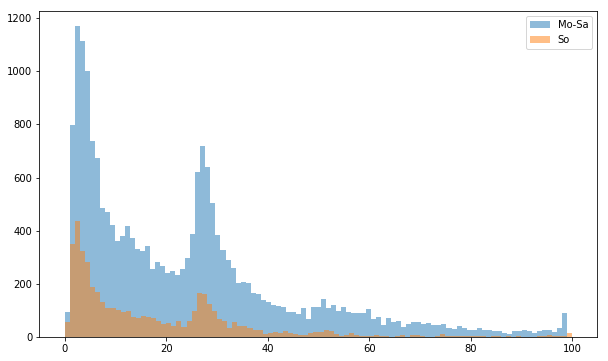

In [16]:
a = df.loc[df.index.dayofweek != 6, 'v']
b = df.loc[df.index.dayofweek == 6,'v']
plt.figure(figsize=(10, 6))
plt.hist(a, bins = 100, alpha=0.5, label='Mo-Sa')
plt.hist(b, bins = 100, alpha=0.5, label='So')
plt.legend(loc='upper right')
plt.show();

Okay, let's talk about this for a second because this kind of thing always surprises people. 

### Let's get closer to clusters

Let's just look at the morning. 

In [17]:
df[(df.index.hour >= 6) & (df.index.hour <= 9)]

,v
ts,
2020-06-26 06:00:08,26
2020-06-26 06:01:09,40
2020-06-26 06:01:39,16
2020-06-26 06:01:54,31
2020-06-26 06:02:54,23
2020-06-26 06:03:40,37
2020-06-26 06:04:08,11
2020-06-26 06:04:24,21
2020-06-26 06:05:09,32


Not really straightforward, but pandas has cool features. Add plot to get a plot.

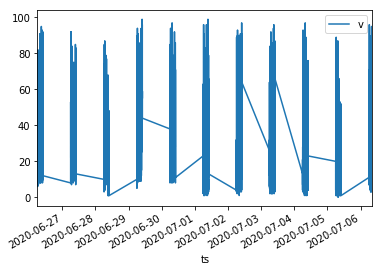

In [18]:
df[(df.index.hour >= 6) & (df.index.hour <= 9)].plot()

We can work with that. Let's just make the time range smaller. 

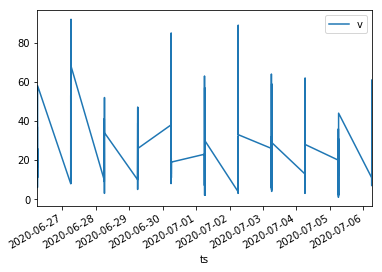

In [19]:
df[(df.index.hour == 6) & (df.index.minute >=0) & (df.index.minute <=15)].plot()

Let's save that for later. 

In [20]:
df1 = df[(df.index.hour == 6) & (df.index.minute >=0) & (df.index.minute <=15)]
df1.describe()

,v
count,281.000000
mean,22.960854
std,17.212596
min,1.000000
25%,11.000000
50%,19.000000
75%,31.000000
max,92.000000


Now what does a histogram look like?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D083E8710>]],
      dtype=object)

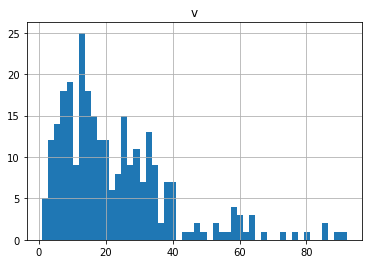

In [21]:
df1.hist(bins=50)

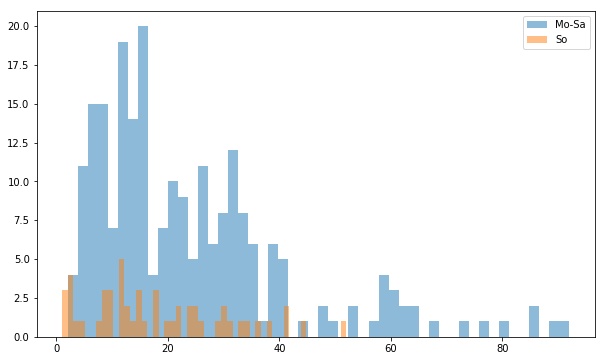

In [22]:
a = df1.loc[df1.index.dayofweek != 6, 'v']
b = df1.loc[df1.index.dayofweek == 6, 'v']
plt.figure(figsize=(10, 6))
plt.hist(a, bins = 50, alpha=0.5, label='Mo-Sa')
plt.hist(b, bins = 50, alpha=0.5, label='So')
plt.legend(loc='upper right')
plt.show();

## At last! Machine Learning...

We will use the super weapon sklearn.

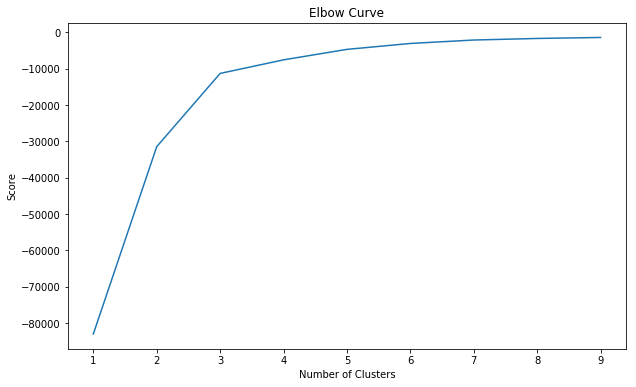

In [23]:
from sklearn.cluster import KMeans

data = df1[['v']]
n_cluster = range(1, 10)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

Basically K-Means is not really suited for anomaly detection, but I like using it a lot because...

If the "number" of ideal clusters changes, then something has changed, right? 

But let's take a look at the results. 

In [24]:
X = df1[['v']]
X = X.reset_index(drop=True)

km = KMeans(n_clusters=4) # <==
km.fit(X)

X['cluster'] = km.predict(X)
labels = km.labels_

In [25]:
X['cluster'].value_counts()

2    109
0     82
3     67
1     23
Name: cluster, dtype: int64

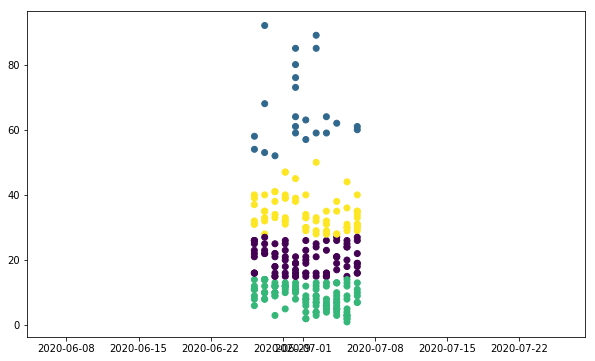

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df1.index, df1['v'], c=labels.astype(np.float)) # Labels... 
# plt.legend()
plt.show();

Oh, cool. Finally, something to show off about. Let's play with it a little. 

## And now things are getting serious.

In [27]:
from sklearn.cluster import DBSCAN
#Density-Based Spatial Clustering of Applications with Noise :)

In [28]:
dbscan = DBSCAN(eps = 2, min_samples = 5) # <== Yep, here... 
clusters = dbscan.fit_predict(df1)

In [29]:
df1.count()

v    281
dtype: int64

In [30]:
df1[clusters != -1].count()

v    265
dtype: int64

In [31]:
df1[clusters == -1].count()

v    16
dtype: int64

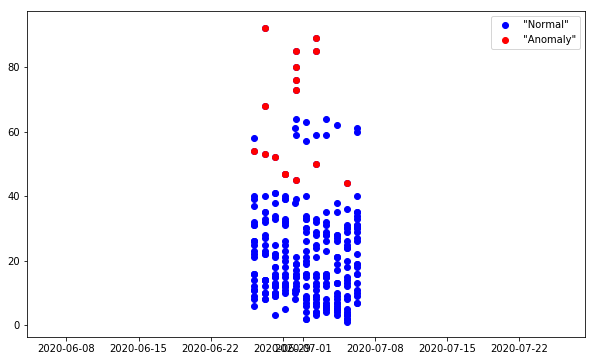

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
a = df1.loc[clusters == -1 ]

ax.scatter(df1.index, df1['v'], color='blue', label='"Normal"') # scatter...
ax.scatter(a.index,a['v'], color='red', label='"Anomaly"')

plt.legend()
plt.show();